### 2. Demographics and Flags
#### Are certain demographics more likely to be stopped?

Import libraries and load data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from matplotlib.ticker import PercentFormatter, FuncFormatter
import matplotlib.ticker as ticker

df = pd.read_csv(r'C:\Users\Dell\DA_FILE\100_My_Project\11_Vehicle_stop_NYPD\NYPD_Vehicle_Stop_Reports.csv')

sns.set_style('ticks')
# change data type 
df['date']=pd.to_datetime(df['OCCUR_DT'])
df['hour']=pd.to_datetime(df['OCCUR_TM'], format='%H:%M:%S').dt.hour

**Gender**
Counted the number of stops per gender and displayed using a pie chart.

In [2]:
# Gender
df_gender = df['SEX_CD'].value_counts().sort_values(ascending=False).to_frame().iloc[:-1,:]

In [3]:
gender_labels = ['Male','Female','Unknown']

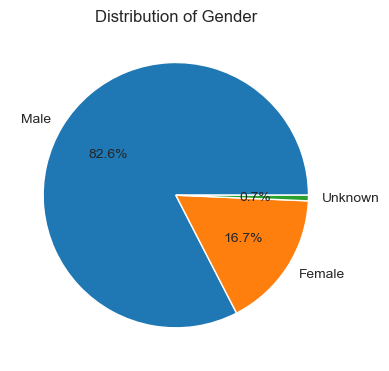

In [4]:
df_gender['count'].plot(
    kind='pie', title='Distribution of Gender', autopct='%1.1f%%', startangle=0, labels=gender_labels,figsize=(4,4))
plt.ylabel('')
plt.tight_layout()
plt.show()

**Insight**
Male drivers are stopped more frequently than females, with over 80% of the stops.

**Race**
Calculated the percentage of stops per race and displayed the top 4 races using a horizontal bar chart.

In [5]:
# Race
df_race = df['RACE_DESC'].value_counts().sort_values(ascending=False).head(4).to_frame()
df_race['perc']=df_race['count'].div(len(df)/100)

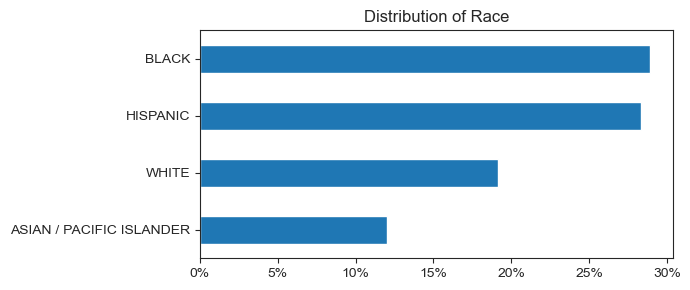

In [6]:
df_race['perc'].plot(kind='barh', figsize=(7,3))
plt.gca().invert_yaxis()
plt.ylabel('')
plt.title('Distribution of Race')
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()


**Insight**
Black and hispanic are make up over 60% of the total stops, White drivers following at about 20%.


**Vehicle**
Counted the number of stops per vehicle category and displayed using a horizontal bar chart.

In [7]:
# Vehicle Category
df_vehicle = df['VEH_CATEGORY'].value_counts().sort_values(ascending=False).head(6).to_frame()
df_vehicle['perc']=df_vehicle['count'].div(len(df)/100)
df_vehicle

,count,perc
VEH_CATEGORY,,
CAR/SUV,1589473,88.112460
MCL,92745,5.141320
TRUCK/BUS,42348,2.347562
BIKE,28421,1.575519
OTHER,27881,1.545584
TLC,23045,1.277500


In [8]:
veh_labels = ['Car/ SUV','Motorcycle','Truck/ Bus','Bicycle', 'Other','Taxi / Limousine']

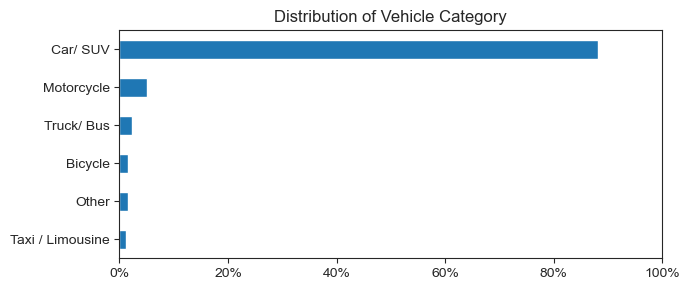

In [9]:
df_vehicle['perc'].plot(kind='barh', figsize=(7,3))
plt.gca().invert_yaxis()
plt.ylabel('')
plt.xlim(0,100)
plt.title('Distribution of Vehicle Category')
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.gca().set_yticklabels(veh_labels)
plt.tight_layout()
plt.show()


**Insight**
Car/ SUV category is the most frequently stopped, nearly 90% of proportion.

**Age**
Removed `UNKNOWN` values in the age column and transformed it into numeric values. Visualized the age distribution as a histogram.

In [10]:
#Age
df_age = df[df['RPTED_AGE']!='UNKNOWN']
df_age['RPTED_AGE'] = pd.to_numeric(df_age['RPTED_AGE'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_15028\3375969863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['RPTED_AGE'] = pd.to_numeric(df_age['RPTED_AGE'])


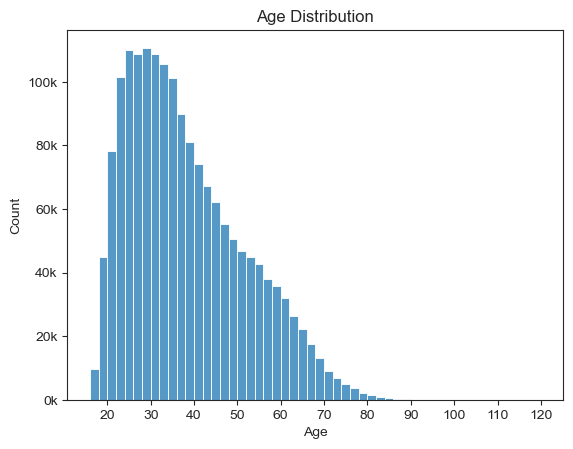

In [11]:
sns.histplot(df_age['RPTED_AGE'],bins=52)

plt.title("Age Distribution")
plt.xlabel('Age')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000):.0f}k'))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

**Insight**
The majority of the drivers who are stopped are between 20 and 70 years old.


#### What are the 'True' rates of flags?

- **'True' Distribution for Each Flag :**
	Narrowed down to 3 flags of interest (Summon issued, Force used, Arrest), and showed the distribution using a 100% stacked horizontal bar chart.

In [12]:
flag_columns = [ 'FORCE_USED_FLG', 'ARREST_MADE_FLG', 'SUMMON_ISSUED_FLG']
flag_labels = ['Force Used','Arrest Made','Summons Issued']
t_f =[True,False]

In [13]:
df_plot =pd.DataFrame()

for flag in flag_columns:
    df_plot[flag]=df[flag].value_counts()
df_plot=df_plot.div(df_plot.sum()/100)
df_plot=df_plot.reindex(t_f)

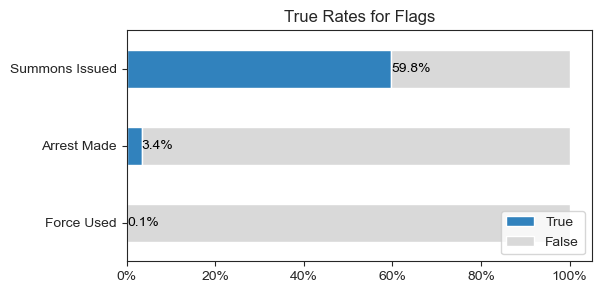

In [14]:
ax= df_plot.T.plot(kind='barh', stacked=True, colormap='tab20c',figsize=(6,3))
# Label only true rates
for num , container in enumerate( ax.containers):
     if num==0:
          labels = [f'{v.get_width():.1f}%' if v.get_width() <60 else '' for v in container]
          ax.bar_label(container, labels=labels,label_type='edge', fontsize=10, color='black')

plt.title('True Rates for Flags')
plt.legend(loc='lower right')
plt.gca().set_yticklabels(flag_labels)
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.show()


**Insight**
Summon have been issued to over 50% of drivers, Arrest rates are about 3% and Force Used rates are 0.1%.
This suggests that lighter issues like summons are more common, and heavier issues are relatively rare.


#### Demographics and True Flag Rates

- **What are the True flag rates for each demographic? :**
	Calculated total 'True' flag rates for each demographic group(gender and race, and age).


#### Force Used vs Gender, Age, Race
Focused on categories of interest, filtered the data accordingly.


In [15]:
# Categories that interested in
flags=['FORCE_USED_FLG', 'ARREST_MADE_FLG', 'SUMMON_ISSUED_FLG']
gender_list = ['M', 'F']
race_list = ['WHITE', 'HISPANIC', 'ASIAN / PACIFIC ISLANDER', 'BLACK']
t_f =[True,False]

In [16]:
# Filter categories 
df_demo= df[df['RACE_DESC'].isin(race_list) & df['SEX_CD'].isin(gender_list)]

**Force Used per Race and Gender**
Created a new DataFrame to calculate the total number of force used per race and gender.
Then normalized the result and showed in a horizontal bar chart.

In [17]:
df_force_demo= df_demo.pivot_table(columns=['RACE_DESC','SEX_CD'], values='EVNT_KEY',aggfunc='count', index='FORCE_USED_FLG')
df_force_demo = df_force_demo.div(df_force_demo.sum()/100, axis=1)
df_force_demo = df_force_demo.reindex(t_f,axis=0)

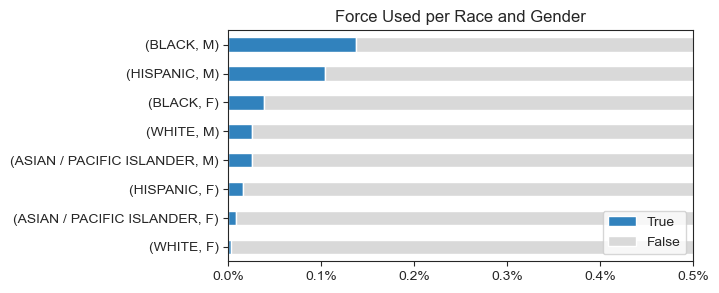

In [30]:
df_force_demo.T.sort_values(by=True).plot(kind='barh', stacked=True, colormap='tab20c',figsize=(6,3))
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=1))
plt.ylabel('')
plt.legend(loc='lower right')
plt.xlim(0,0.5)
plt.title('Force Used per Race and Gender')
plt.show()

**Insight**

Although pretty small amount of Force Used rate for each category,
Black Male category has the highest rate of Force used at 0.15%, followed by Hispanic Male.
White Female category has the lowest rate nearly 0%.
Fore used on Black Female category than White Male.

#### Arrest vs Gender, Age, Race

In [19]:
df_arrest_demo= df_demo.pivot_table(columns=['RACE_DESC','SEX_CD'], values='EVNT_KEY',aggfunc='count', index='ARREST_MADE_FLG')
df_arrest_demo = df_arrest_demo.div(df_arrest_demo.sum()/100, axis=1)
df_arrest_demo = df_arrest_demo.reindex(t_f,axis=0)

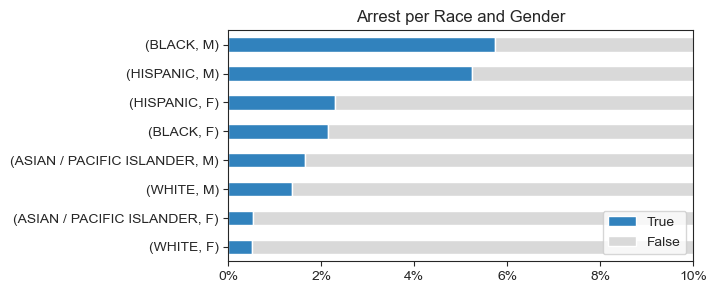

In [20]:
df_arrest_demo.T.sort_values(by=True).plot(kind='barh', stacked=True, colormap='tab20c',figsize=(6,3))
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.ylabel('')
plt.xlim(0,10)
plt.legend(loc='lower right')
plt.title('Arrest per Race and Gender')
plt.show()

**Insight**

Black Male category has the highest arrest rate at 6%, followed by Hispanic Male.
White Female category has the lowest arrest rate.


#### Summons per Race and Gender

In [21]:
df_summon_demo= df_demo.pivot_table(columns=['RACE_DESC','SEX_CD'], values='EVNT_KEY',aggfunc='count', index='SUMMON_ISSUED_FLG')
df_summon_demo = df_summon_demo.div(df_summon_demo.sum()/100, axis=1)
df_summon_demo = df_summon_demo.reindex(t_f,axis=0)

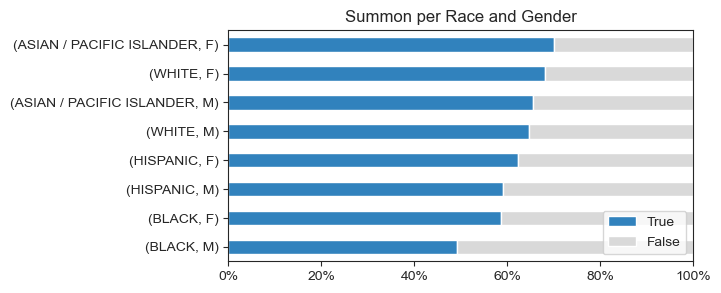

In [29]:
df_summon_demo.T.sort_values(by=True).plot(kind='barh', stacked=True, colormap='tab20c',figsize=(6,3))
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.ylabel('')
plt.xlim(0,100)
plt.legend(loc='lower right')
plt.title('Summon per Race and Gender')
plt.show()

**Insight**
Asian/ Pacific islander Female category has the highest summons rate at 70%, followed by White female.
Black Male has the lowest summons rate, below 50%.

### Age Analysis

**Force Used per Age**
Removed `UNKNOWN` data from age and counted the number of stops, plotted percentage using a bar chart

In [23]:
df_age_forced = df_age.pivot_table(index='RPTED_AGE',columns='FORCE_USED_FLG',aggfunc='count',values='EVNT_KEY')
df_age_forced = df_age_forced.div(df_age_forced.sum(axis=1)/100, axis=0)

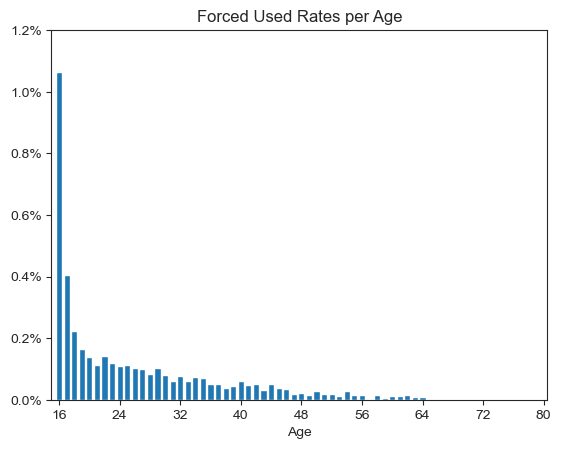

In [24]:
df_age_forced[True].plot(kind='bar',width=0.8)
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=1))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(8))
plt.ylim(0,1.2)
plt.xlabel('Age')
plt.gca().tick_params(axis='x', labelrotation=0)
plt.title('Forced Used Rates per Age')
plt.xlim(-1,64.5)
plt.show()

**Insight**

16 years old driver has the highest rate of force used, with over 1% of 16 years old drivers involved in.
Overall younger drivers have higher force used rates.

**Arrest per Age**

In [25]:
df_age_arrest = df_age.pivot_table(index='RPTED_AGE',columns='ARREST_MADE_FLG',aggfunc='count',values='EVNT_KEY')
df_age_arrest = df_age_arrest.div(df_age_arrest.sum(axis=1)/100, axis=0)

(-1.0, 64.5)

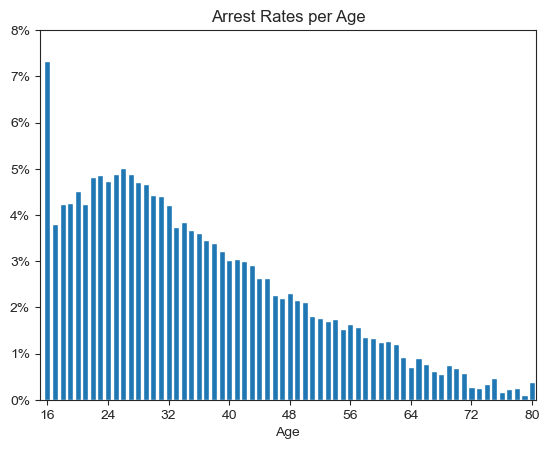

In [26]:
df_age_arrest[True].plot(kind='bar',width=0.8)
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(8))
plt.ylim(0,8)
plt.xlabel('Age')
plt.gca().tick_params(axis='x', labelrotation=0)
plt.title('Arrest Rates per Age')
plt.xlim(-1,64.5)

**Insight**

16 years old drivers have the highest arrest rate at 7%, with peak arrest at 30 years old driver, arrest rate decreases as driver's age increases. 

**Summon per Age**

In [27]:
df_age_summon = df_age.pivot_table(index='RPTED_AGE',columns='SUMMON_ISSUED_FLG',aggfunc='count',values='EVNT_KEY')
df_age_summon = df_age_summon.div(df_age_summon.sum(axis=1)/100, axis=0)

(-1.0, 64.5)

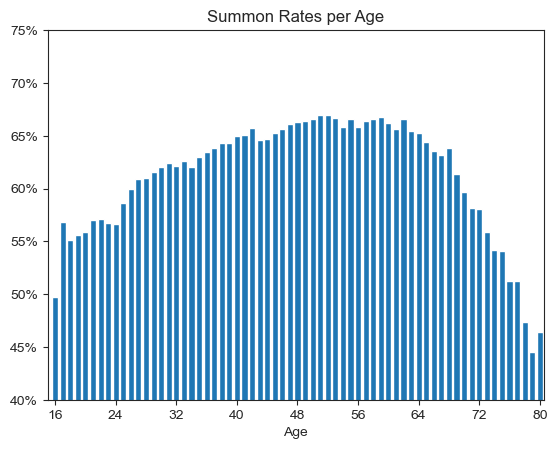

In [28]:
df_age_summon[True].plot(kind='bar',width=0.8)
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(8))
plt.ylim(40,75)
plt.xlabel('Age')
plt.gca().tick_params(axis='x', labelrotation=0)
plt.title('Summon Rates per Age')
plt.xlim(-1,64.5)

**Insight**

Summon rates are going higher along with age around 40 -70 years old and then going down.